<a href="https://colab.research.google.com/github/anchal931/Global-Trend-Analysis/blob/main/Global_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/sample_data/gapminder_full.csv')

In [7]:
df['country'].value_counts()

,count
country,
Afghanistan,12
Albania,12
Algeria,12
Angola,12
Argentina,12
...,...
Vietnam,12
West Bank and Gaza,12
"Yemen, Rep.",12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### 1.	Load the dataset and display the first few rows. How many countries does the dataset have?

In [9]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [10]:
df['country'].nunique()

142

### 2.	Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [11]:
pivot_table_life_exp = pd.pivot_table(df, values='life_exp', index='continent', columns='year',aggfunc='mean')
pivot_table_life_exp

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


### 3.	Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [12]:
gdp_75th_percentile_2007 = df[df['year']==2007]['gdp_cap'].quantile(0.75)
high_gdp_2007 = df[(df['year']==2007) & (df['gdp_cap']>gdp_75th_percentile_2007)]
high_gdp_2007[['country','gdp_cap']]

,country,gdp_cap
71,Australia,34435.36744
83,Austria,36126.49270
95,Bahrain,29796.04834
119,Belgium,33692.60508
251,Canada,36319.23501
407,Czech Republic,22833.30851
419,Denmark,35278.41874
527,Finland,33207.08440
539,France,30470.01670
575,Germany,32170.37442


### 4.	Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [13]:
df['Life_Exp_Range'] = pd.cut(df['life_exp'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


### 5.	Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

In [14]:
data_2007 = df[df['year']==2007]
highest_gdp_2007 = data_2007.sort_values(by='gdp_cap', ascending=False).head(5)
highest_gdp_2007[['country','gdp_cap']]

,country,gdp_cap
1151,Norway,49357.19017
863,Kuwait,47306.98978
1367,Singapore,47143.17964
1619,United States,42951.65309
755,Ireland,40675.99635


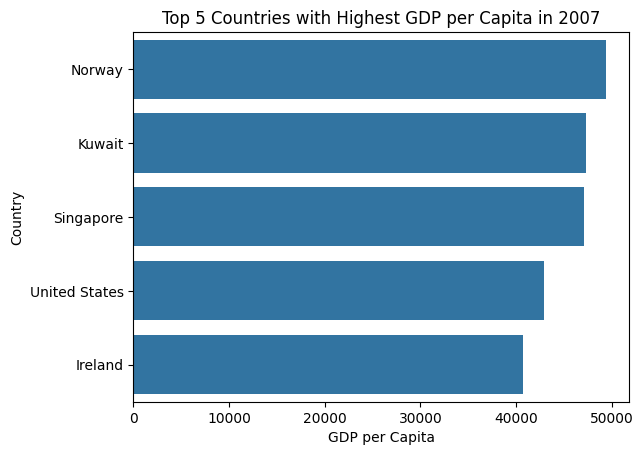

In [15]:
sns.barplot(data=highest_gdp_2007, x='gdp_cap', y='country')
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest GDP per Capita in 2007')
plt.show()

### 6.	Find all country names that start with "I" and end with "a" using regex.

In [16]:
import re
pattern=r'\bI\w*a\b'
country_names_with_pattern = re.findall(pattern," ".join(df['country']))
country_with_pattern = list(set(country_names_with_pattern))
country_with_pattern

['Indonesia', 'India']

### 7.	Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

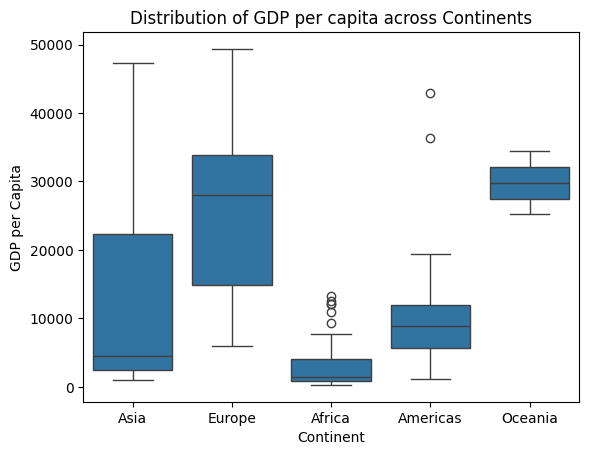

In [17]:
sns.boxplot(data=data_2007, x='continent', y='gdp_cap')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.title('Distribution of GDP per capita across Continents')
plt.show()

### 8.	Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [18]:
countries_with_life_exp_over_80 = df[(df['year']==2007) & (df['life_exp']>80)]
countries_with_life_exp_over_80[['country','continent','life_exp']]

,country,continent,life_exp
71,Australia,Oceania,81.235
251,Canada,Americas,80.653
539,France,Europe,80.657
671,"Hong Kong, China",Asia,82.208
695,Iceland,Europe,81.757
767,Israel,Asia,80.745
779,Italy,Europe,80.546
803,Japan,Asia,82.603
1103,New Zealand,Oceania,80.204
1151,Norway,Europe,80.196


### 9.	Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [19]:
df['Decade'] = (df['year'] // 10 * 10).astype(str) + 's'
df.head(10)


,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decade
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low,1970s
5,Afghanistan,1977,14880372,Asia,38.438,786.113360,Medium,1970s
6,Afghanistan,1982,12881816,Asia,39.854,978.011439,Medium,1980s
7,Afghanistan,1987,13867957,Asia,40.822,852.395945,Medium,1980s
8,Afghanistan,1992,16317921,Asia,41.674,649.341395,Medium,1990s
9,Afghanistan,1997,22227415,Asia,41.763,635.341351,Medium,1990s


### 10.	Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

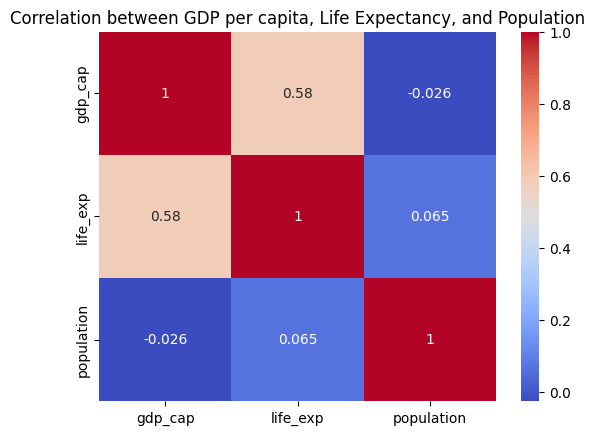

In [20]:
corr_matrix = df[['gdp_cap', 'life_exp', 'population']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between GDP per capita, Life Expectancy, and Population')
plt.show()

### 11.	How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.

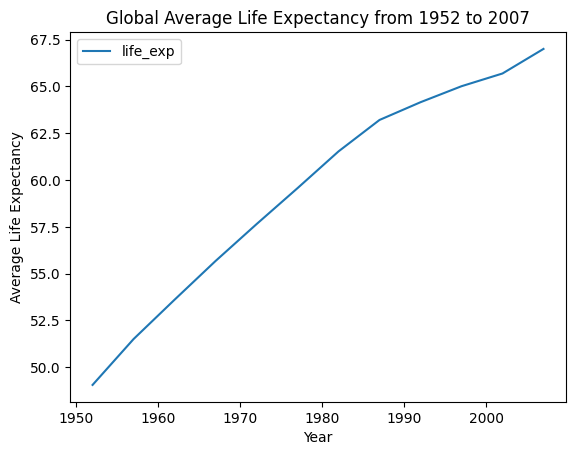

In [21]:
pivoted = pd.pivot_table(df, values='life_exp', index='year', aggfunc='mean')

sns.lineplot(data=pivoted)
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Global Average Life Expectancy from 1952 to 2007')
plt.show()

## ***Subjective Question:***

### 12.	For the year 2007, analyze the relationship between life expectancy and GDP per capita.
Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.

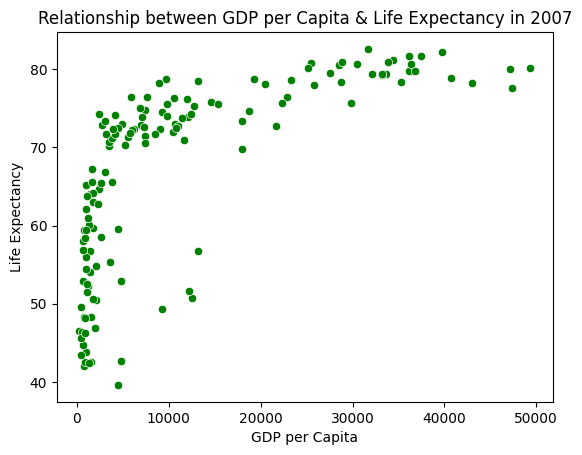

In [22]:
sns.scatterplot(data=data_2007, x='gdp_cap', y='life_exp',color='green')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Relationship between GDP per Capita & Life Expectancy in 2007')
plt.show()

### 13.	Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

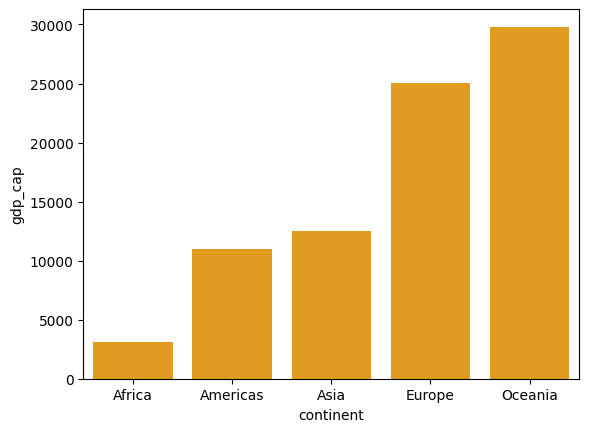

In [23]:
ag_gdp_per_capita_2007 = data_2007.groupby('continent')['gdp_cap'].mean()
sns.barplot(data=ag_gdp_per_capita_2007,color='orange')
plt.show()

### 14.	Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
-	Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
-	Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.


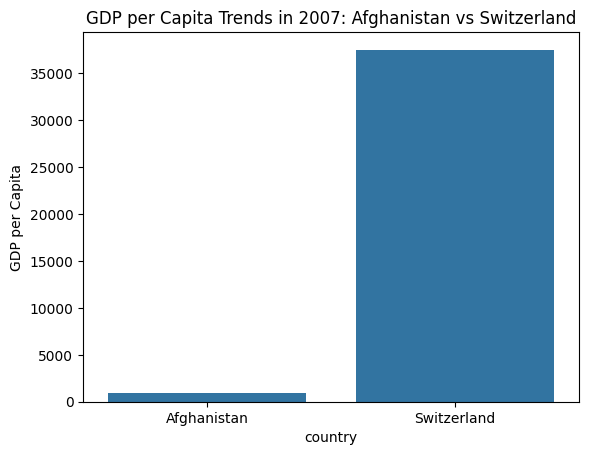

In [24]:
data_2007_afg_swz = df[(df['year']==2007) & (df['country'].isin(['Afghanistan','Switzerland']))]
sns.barplot(data=data_2007_afg_swz, x='country', y='gdp_cap')
plt.xlabel('country')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Trends in 2007: Afghanistan vs Switzerland')
plt.show()


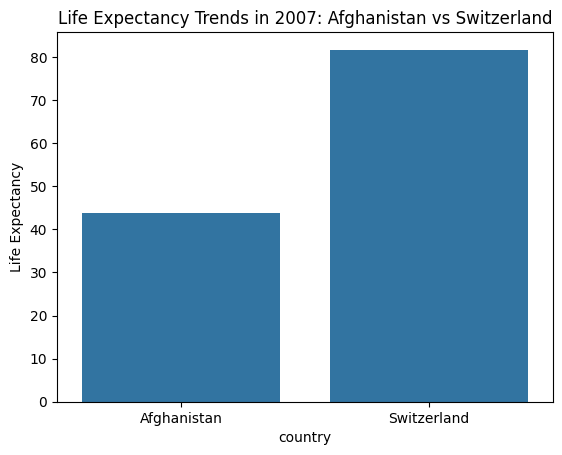

In [25]:
data_2007_afg_swz = df[(df['year']==2007) & (df['country'].isin(['Afghanistan','Switzerland']))]
sns.barplot(data=data_2007_afg_swz, x='country', y='life_exp')
plt.xlabel('country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends in 2007: Afghanistan vs Switzerland')
plt.show()

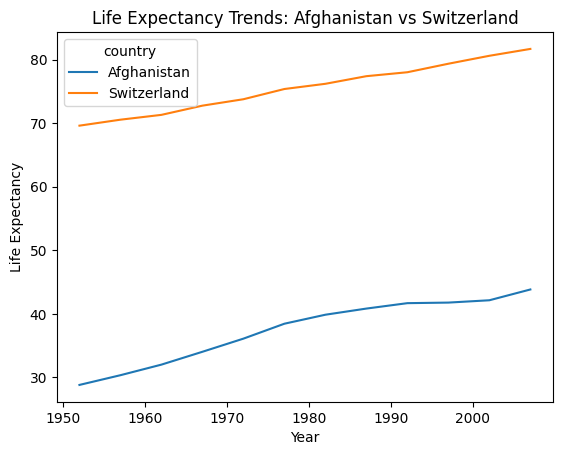

In [26]:
sns.lineplot(data=df[df['country'].isin(['Afghanistan','Switzerland'])],x='year',y='life_exp',hue='country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends: Afghanistan vs Switzerland')
plt.show()